### **Hotels Reviews Classification Course Project**
CCAI 413 Natural Language Processing

# 1. Data Loading and Basic Data Exploration

In [ ]:
! pip install tensorflow
! pip install nltk
! pip install datasets
! pip install Tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 41.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 16.7 MB/s eta 0:00:00


In [ ]:
# Import all relevant libraries
import re
import nltk
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tashaphyne.stemming import ArabicLightStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Exploratory Data Analysis**


In [ ]:
# Load the HARD dataset from Hugging Face
dataset = load_dataset("hard", split='train')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/105698 [00:00<?, ? examples/s]

In [ ]:
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 105698
})

In [ ]:
# Convert the dataset to DataFrame to handle it with pandas and the numpy libraries
df = pd.DataFrame(dataset)
df.head()

,text,label
0,“ممتاز”. النظافة والطاقم متعاون.,1
1,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...,4
2,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...,4
3,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...,0
4,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...,3


In [ ]:
max_per_class = 2500
# Create a balanced dataset
df = df.groupby('label').apply(lambda x: x.sample(max_per_class, random_state=42)).reset_index(drop=True)

In [ ]:
# Display the size of Dataset
print(f"Dataset rows:  {df.shape[0]}\nDataset features:  {df.shape[1]}")

Dataset rows:  10000
Dataset features:  2


In [ ]:
# Count the Frequency for each label -> Unbalancd dataset
df['label'].value_counts()

label
0    2500
1    2500
3    2500
4    2500
Name: count, dtype: int64

In [ ]:
# check target values
df['label'].unique()

array([0, 1, 3, 4])

In [ ]:
# change labels
label_map = { 0:1, 1: 2, 3:3 , 4: 4}

# Apply the mapping
df['label'] = df['label'].replace(label_map)

In [ ]:
# check target values
df['label'].unique()

array([1, 2, 3, 4])

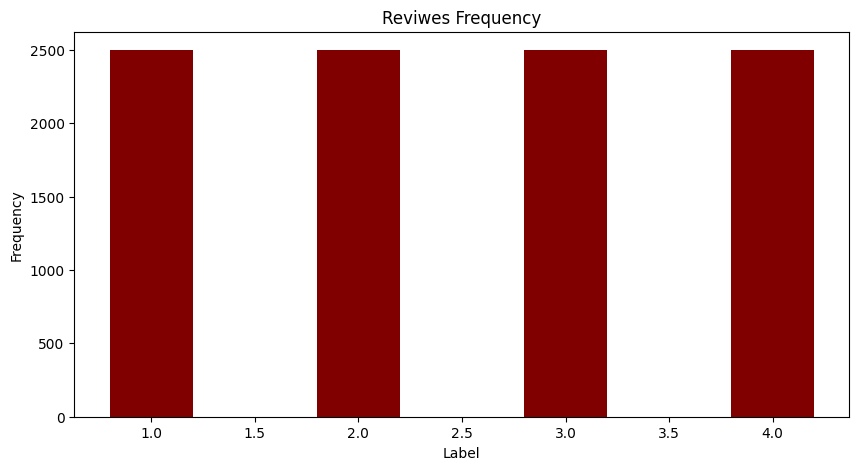

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['label'].unique(), df['label'].value_counts(), color ='maroon', width = 0.4)

plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Reviwes Frequency")
plt.show()

In [ ]:
# display some info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [ ]:
# display the frequencies
df.count()

text     10000
label    10000
dtype: int64

In [ ]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,10000.0,2.5,1.11809,1.0,1.75,2.5,3.25,4.0


In [ ]:
# check missing values
df.isna().sum()

text     0
label    0
dtype: int64

## **Data Cleaning**

In [ ]:
# Define clean objects
arabic_stopwords = stopwords.words('arabic')
ArListem=ArabicLightStemmer()

In [ ]:
arabic_punctuations = '''`÷« »×؛<>٩٨'٧٦٥٤٣٢١٠_()↗*•&^%][ـ،/:".,'{}⋮≈~¦+|٪”…“–ـ/[]%=#*+\\•~@£·_{}©^®`→°€™›♥←×§″′Â█à…“★”–●â►−¢¬░¶↑±▾	═¦║―¥▓—‹─▒：⊕▼▪†■’▀¨▄♫☆é¯♦¤▲è¸Ã⋅‘∞∙）↓、│（»，♪╩╚³・╦╣╔╗▬❤ïØ¹≤‡₹´$&'()*+,-./:;<=>@[\]^_`{|}~'''

arabic_diacritics = re.compile("""
                             ّ    |
                             َ    |
                             ً    |
                             ُ    |
                             ٌ    |
                             ِ    |
                             ٍ    |
                             ْ    |
                             ـ
                         """, re.VERBOSE)


In [ ]:
# Clean data
def dataframe_cleaing(df):
    df['text'] = df['text'].apply(lambda x: data_cleaning(x))
    return df

def data_cleaning(x):
    x = str(x)
    # Remove diacritics
    x = re.sub(arabic_diacritics, '', x)
    # Normlize text
    x = re.sub("[إأآا]", "ا", x)
    x = re.sub("ى", "ي", x)
    x = re.sub("ؤ", "ء", x)
    x = re.sub("ئ", "ء", x)
    x = re.sub("ة", "ه", x)
    x = re.sub("گ", "ك", x)
    # Remove punctuations
    translator = str.maketrans(arabic_punctuations, ' '*len(arabic_punctuations))
    x = x.translate(translator)
    # Tokenize text
    tokens = word_tokenize(x)
    # Stemming of words
    stemmed = [ArListem.light_stem(word) for word in tokens]
    x = ' '.join(stemmed)
    # Remove stopwords
    x = ' '.join([word for word in x.split() if word not in arabic_stopwords])

    return x


In [ ]:
# call clean_text function to clean data
df=dataframe_cleaing(df)

In [ ]:
# Display dataset
df.sample(frac=1, random_state=42).reset_index(drop=True).head()

,text,label
0,مريح معن كلمه عيد سط زحم مدينه وفر مواصل قيمه ...,4
1,دق نيق مريح رسبشن مشغول عنكمراوغين,1
2,راءع مبالغه سعر غرفه,3
3,سيء جد حرام كو سم دق,2
4,جيد هدوء نظافه,3


# Data Splitting

In [ ]:
# Splitting Data
X = df['text'].values
y = df['label'].values

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8000,) (8000,)
Testing set shape: (2000,) (2000,)


# Model Building

## **Machine Learning Model**

### Data Embedding

In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()

In [ ]:
print(f"Training dataset size:\nX_train_vectorized:{X_train_vectorized.shape}\ny_train:{y_train.shape}\n")

Training dataset size:
X_train_vectorized:(8000, 28054)
y_train:(8000,)



In [ ]:
# Build the model
svm = SVC(kernel="sigmoid", gamma=0.01, C=1,degree=12)

# Trained the model
svm.fit(X_train_vectorized,y_train)

SVC(C=1, degree=12, gamma=0.01, kernel='sigmoid')

In [ ]:
#Predict the model
y_pred = svm.predict(X_test_vectorized)

In [ ]:
test_vectorized = vectorizer.transform(["انه فندق سيء"]).toarray()
y_pred = svm.predict(test_vectorized)
y_pred

array([3])

In [ ]:
# Evaluate the model
print(f"The confusion matrix \n {confusion_matrix(y_test,y_pred)}")
print(f"\n The classification report \n {classification_report(y_test,y_pred)}")

The confusion matrix 
 [[164 250  93   5]
 [ 25 337 138   0]
 [  1  14 473   4]
 [  2  15 362 117]]

 The classification report 
               precision    recall  f1-score   support

           1       0.85      0.32      0.47       512
           2       0.55      0.67      0.60       500
           3       0.44      0.96      0.61       492
           4       0.93      0.24      0.38       496

    accuracy                           0.55      2000
   macro avg       0.69      0.55      0.51      2000
weighted avg       0.69      0.55      0.51      2000



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint

# Define the parameter grid
param_dist = {
    'C': uniform(1, 10),
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': randint(1, 10)
}

# SVM classifier
svm_classifier = SVC()

#  RandomizedSearchCV
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=4, cv=2, verbose=2, random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV
random_search.fit(X_train_vectorized, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 2.560186404424365, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
#  predictions for train
y_pred = random_search.predict(X_train_vectorized)

# classification report
print(f"The confusion matrix \n {confusion_matrix(y_train,y_pred)}")
print(f"\n The classification report \n {classification_report(y_train,y_pred)}")

The confusion matrix 
 [[1975    2    2    9]
 [  14 1980    4    2]
 [   0    0 2001    7]
 [   0    0   10 1994]]

 The classification report 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1988
           2       1.00      0.99      0.99      2000
           3       0.99      1.00      0.99      2008
           4       0.99      1.00      0.99      2004

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [ ]:
#  predictions
y_pred = random_search.predict(X_test_vectorized)

# classification report
print(f"The confusion matrix \n {confusion_matrix(y_test,y_pred)}")
print(f"\n The classification report \n {classification_report(y_test,y_pred)}")

The confusion matrix 
 [[388  87  21  16]
 [132 317  39  12]
 [ 16  45 340  91]
 [ 25  16  80 375]]

 The classification report 
               precision    recall  f1-score   support

           1       0.69      0.76      0.72       512
           2       0.68      0.63      0.66       500
           3       0.71      0.69      0.70       492
           4       0.76      0.76      0.76       496

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



In [ ]:
test_vectorized = vectorizer.transform(["انه فندق سيء"]).toarray()
y_pred_after = svm.predict(test_vectorized)
y_pred_after

array([1])

In [ ]:
test_vectorized = vectorizer.transform(["رائع"]).toarray()
y_pred_after2 = svm.predict(test_vectorized)
y_pred_after2

array([4])

## **Deep Learning Model**

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# maximum sequence length based on the training set
max_len_train = max([len(seq) for seq in X_train_sequences])

In [ ]:
# Padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len_train, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len_train, padding='post')

In [ ]:
#convert labels to start from zero
y_train= [label - 1 for label in y_train]
y_test = [label - 1 for label in y_test]

#Convert numerical labels to one-hot encoded categorical labels
y_train_categorical = to_categorical(y_train, 4)
y_test_categorical = to_categorical(y_test, 4)

In [ ]:
# BiLSTM Config
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len_train),# Embedding layer
    Bidirectional(LSTM(16, return_sequences=False)),# Bidirectional LSTM layer
    Dropout(0.4),# Dropout layer for regularization
    Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),# Fully connected layer with L2 regularization
    Dropout(0.7),# Dropout layer for regularization
    Dense(4, activation='softmax')# Output layer with softmax activation for classification into 4 classes
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model architeture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 553, 100)          1715800   
                                                                 
 bidirectional (Bidirection  (None, 32)                14976     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                        

In [ ]:
# Train the model
h = model.fit( X_train_padded, y_train_categorical, validation_split=0.2, epochs=5, batch_size=32, shuffle=True)

Epoch 1/5
200/200 [==============================] - 23s 101ms/step - loss: 1.2215 - accuracy: 0.4209 - val_loss: 0.8101 - val_accuracy: 0.7100
Epoch 2/5
200/200 [==============================] - 13s 64ms/step - loss: 0.8663 - accuracy: 0.6169 - val_loss: 0.6666 - val_accuracy: 0.7212
Epoch 3/5
200/200 [==============================] - 10s 51ms/step - loss: 0.6910 - accuracy: 0.7061 - val_loss: 0.6246 - val_accuracy: 0.7394
Epoch 4/5
200/200 [==============================] - 9s 45ms/step - loss: 0.5818 - accuracy: 0.7627 - val_loss: 0.6586 - val_accuracy: 0.7431
Epoch 5/5
200/200 [==============================] - 7s 37ms/step - loss: 0.5016 - accuracy: 0.7902 - val_loss: 0.6818 - val_accuracy: 0.7369


In [ ]:
import numpy as np

# Prediction
y_pred = model.predict(X_test_padded)

# Convert one-hot encoded predictions back to class indices
y_pred_indices = np.argmax(y_pred, axis=1)
y_test_indices = np.argmax(y_test_categorical, axis=1)

target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
report = classification_report(y_test_indices, y_pred_indices, target_names=target_names)

# classification report
print(report)

63/63 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

     Class 1       0.72      0.78      0.75       512
     Class 2       0.70      0.67      0.69       500
     Class 3       0.75      0.69      0.72       492
     Class 4       0.75      0.78      0.76       496

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [ ]:
# Predict on a new sample
test_texts = ["انه فندق جيد"]
test_sequences = tokenizer.texts_to_sequences(test_texts)
X_test_padded = pad_sequences(test_sequences, maxlen=553)

y_pred = model.predict(X_test_padded)
predicted_class = y_pred.argmax(axis=-1)
print(predicted_class)

1/1 [==============================] - 1s 657ms/step
[3]


In [ ]:
test_texts = [" ممتاز ورائع انصح به  "]
test_sequences = tokenizer.texts_to_sequences(test_texts)
X_test_padded = pad_sequences(test_sequences, maxlen=553)

y_pred = model.predict(X_test_padded)
predicted_class = y_pred.argmax(axis=-1)+1
print(predicted_class)

1/1 [==============================] - 0s 29ms/step
[4]
